### One Class SVM - Ch1 test 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from tqdm import tqdm

In [2]:
df_stats_Ch1_test2 = pd.read_csv("estadisticos_test2_ch1.csv" , sep = ',')
X_Ch1 = df_stats_Ch1_test2[['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']].values

In [3]:
X_primerCuarto = X_Ch1[:int(len(X_Ch1)/4)]
X_train = X_primerCuarto

In [4]:
clf = svm.OneClassSVM(kernel="rbf", gamma = 0.01, tol=1e-15, nu=1e-15)
clf.fit(X_train)

OneClassSVM(gamma=0.01, nu=1e-15, tol=1e-15)

In [5]:
clf.predict(X_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [6]:
X_test = X_Ch1[int(len(X_Ch1)/4):]

In [7]:
y_pred = clf.predict(X_test)

In [8]:
y_pred_complete = clf.predict(X_Ch1)

In [9]:
comienzo_1hora_anomalias = 'NA'
for i in range(len(y_pred)):
    if (y_pred[i:i+6] == -1).all():
        comienzo_1hora_anomalias = i + len(X_train)
        break

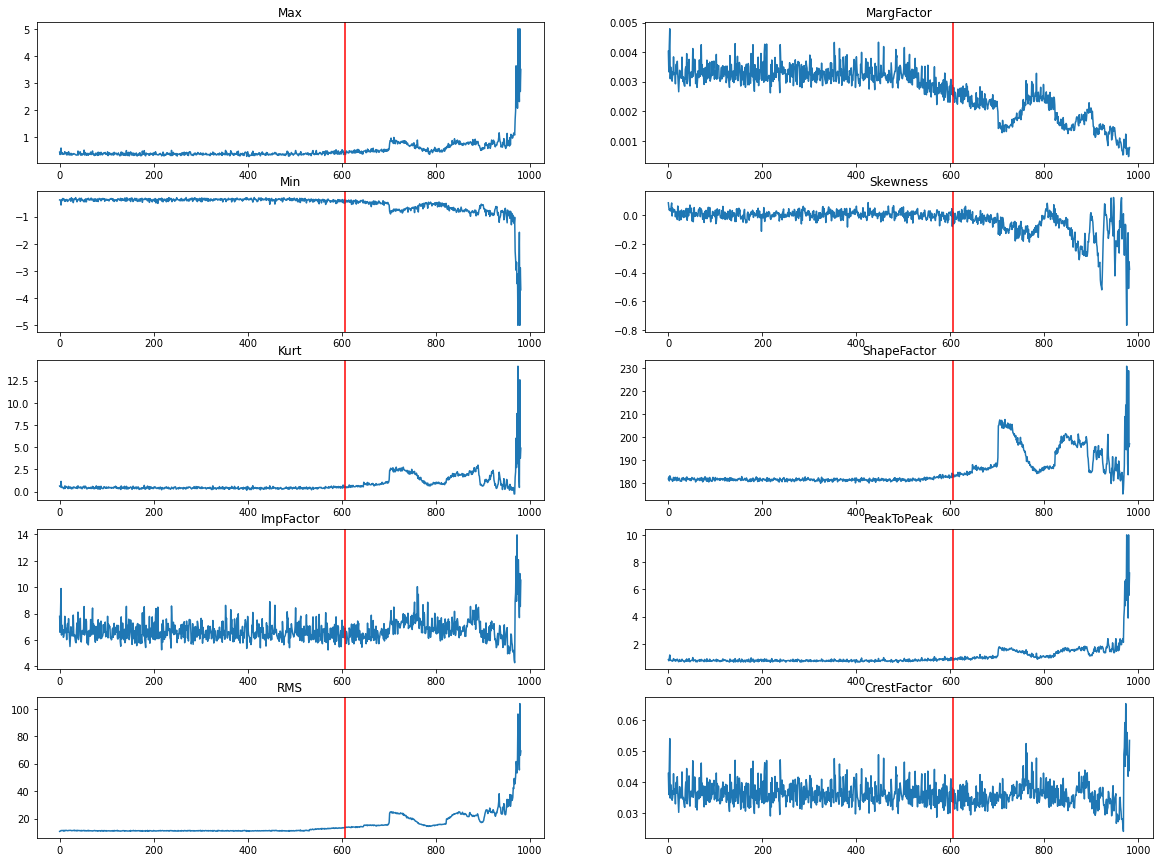

In [10]:
n_signal = list(range(len(X_Ch1)))
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(20, 15)
i = 0
j = 0
for stat in df_stats_Ch1_test2.columns:
    ax[i,j].plot(n_signal, df_stats_Ch1_test2[stat])
    ax[i,j].set_title(stat)
    ax[i,j].axvline(comienzo_1hora_anomalias, color = 'red')
    if (i <= 4):
        i += 1
    if (i > 4):
        i = 0
        j += 1

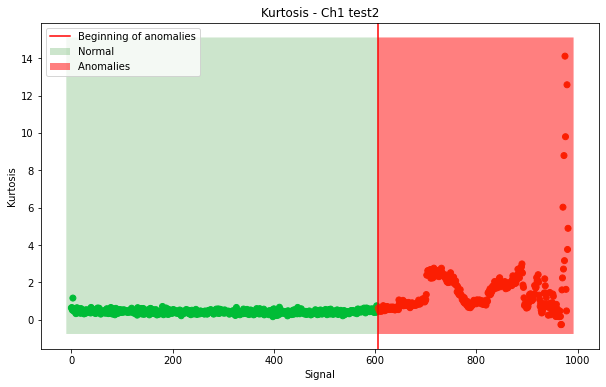

In [11]:
colores = ["#00cc44", "#f73e05"]
kurtosis = df_stats_Ch1_test2['Kurt']
n_signal = list(range(len(kurtosis)))
n_signal = np.array(n_signal)
pred_OCSVM_1hora_anomalias = [0] * comienzo_1hora_anomalias + [1] * (len(X_Ch1) - comienzo_1hora_anomalias)
x = np.arange(-10, len(df_stats_Ch1_test2)+10, 0.02)
plt.figure(figsize=(10,6))
plt.scatter(n_signal, kurtosis, c = np.take(colores, pred_OCSVM_1hora_anomalias))
plt.axvline(comienzo_1hora_anomalias, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(kurtosis)-0.5, max(kurtosis)+1, where = x < comienzo_1hora_anomalias, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(kurtosis)-0.5, max(kurtosis)+1, where =  x > comienzo_1hora_anomalias, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Kurtosis - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Kurtosis')
plt.legend(loc = 2)

In [12]:
print('Comienzo de anomalías cuando se producen durante una hora')
print('OCSVM:', (len(df_stats_Ch1_test2) - comienzo_1hora_anomalias) * 10, ' minutos')

Comienzo de anomalías cuando se producen durante una hora
OCSVM: 3760  minutos
